# Regressão Linear Simples

### Dataset Boston Houses

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Trabalhando com o Datase

In [3]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Calculando a média da variável de resposta
media = dataset['target'].mean()

In [6]:
media

22.532806324110698

In [7]:
# Calculando o SSE
squared_errors = pd.Series(media - dataset['target'])**2
SSE = np.sum(squared_errors)
print("Soma dos Quadrados dos Erros (SSE): %01.f" % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


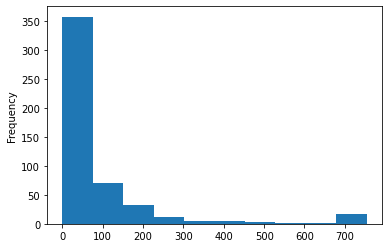

In [8]:
# Histograma dos erros
hist_plot = squared_errors.plot(kind = 'hist')

In [9]:
# Função para calcular o desvio padrão
def calcula_desvio_padrao(a, bias = 0):
    obs = float(len(a))
    return np.sqrt(np.sum((a - np.mean(a))**2) / (obs - min(bias, 1)))

In [10]:
# Imprimindo o desvio padrão via fórmula e via NumPy
print("Resultado da Função: %0.5f | Resultado do NumPy: %0.5f" % (calcula_desvio_padrao(dataset['RM']), np.std(dataset['RM'])))

Resultado da Função: 0.70192 | Resultado do NumPy: 0.70192


### Funções para calcular a variância e a correlação

In [11]:
def covariance(a, b, bias = 0):
    obs = float(len(a))
    return np.sum((a - np.mean(a)) * (b - np.mean(b))) / (obs - min(bias, 1))

In [12]:
def standardize(a):
    return (a - np.mean(a)) / np.std(a)

In [13]:
def correlation(a, b, bias = 0):
    return covariance(standardize(a), standardize(b), bias)

In [14]:
# Compara o resultado das nossas funções com a função pearson do SciPy
from scipy.stats.stats import pearsonr
print("Nossa estimativa de Correlação: %0.5f" % (correlation(dataset['RM'], dataset['target'])))
print("Correlação a partir da função pearson do SciPy: %0.5f" % pearsonr(dataset['RM'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.69536
Correlação a partir da função pearson do SciPy: 0.69536


In [15]:
# Definindo o range dos valores de x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

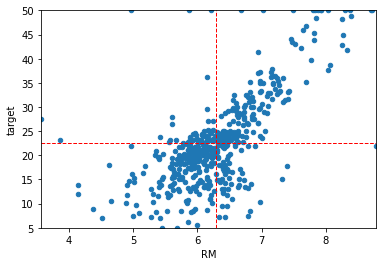

In [16]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com o StatsModels

In [17]:
# Importando as funções
import statsmodels.api as sm
import statsmodels.formula.api as smf # (simula a criação do modelo em linguarem R)

In [18]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matriz.
y = dataset['target']
X = dataset['RM']

# Esse comando adiciona os valores dos coeficientes à variável X (o bias será calculado internamente pela função)
X = sm.add_constant(X)

In [19]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [20]:
# Essa alternativa é muito similar ao código equivalente em linguagem R
lr_modelo = smf.ols(formula = 'target ~ RM', data = dataset)
lr_modelo = lr_modelo.fit()

In [21]:
# Criando um modelo Ordinary Least Squares (outra forma de se referir a regressão linear)
modelo = sm.OLS(y, X)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        18:40:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Imprimindo os Parâmetros
print(modelo.params)

const   -34.670621
RM        9.102109
dtype: float64


In [23]:
# Gerando os valores previstos
valores_previstos = modelo.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [24]:
# Fazendo previsões
RM = 5
Xp = np.array([1, RM])
print("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


### Gerando um ScatterPlot com a Linha de Regressão

In [25]:
# Range de valores para x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

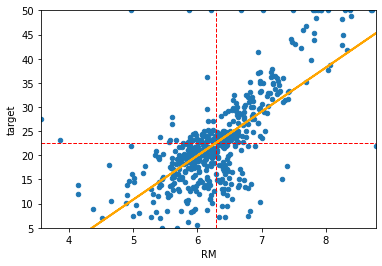

In [26]:
# Primeria camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [27]:
# Comparação entre a função predict() e a função dot()
coeficientes = np.array(modelo.params)
previsoes_dot = np.dot(X, coeficientes)
print("Usando a função predict(): %s" % valores_previstos[:10])
print("Usando coeficientes e função dot: %s" % previsoes_dot[:10])

Usando a função predict(): 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Usando coeficientes e função dot: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [28]:
# Gerando os resíduos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

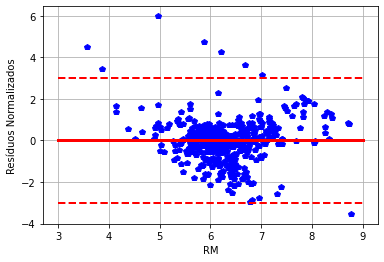

In [29]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados, 'bp')
plt.xlabel('RM')
plt.ylabel('Resíduos Normalizados')
mean_residual = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Cria o objeto
modelo = LinearRegression(normalize = False, fit_intercept = True)

In [32]:
# Define os valores de x e y
num_obs = len(dataset)
X = dataset['RM'].values.reshape((num_obs, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dataset['target'].values # y pode ser um vetor

In [33]:
# Aplica o modelo - fit()
modelo.fit(X, y)

LinearRegression()

In [34]:
# Imprime os coeficientes
print(modelo.coef_)
print(modelo.intercept_)

[9.10210898]
-34.67062077643857


In [35]:
# Imprime as previsões
print(modelo.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


### Comparação StatsModels x ScikitLearn

In [36]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=101)

In [37]:
%%time
sk_linear_regression = LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX, Hy)

CPU times: user 387 ms, sys: 223 ms, total: 610 ms
Wall time: 211 ms


LinearRegression()

In [38]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 1.65 s, sys: 779 ms, total: 2.43 s
Wall time: 939 ms


## Cost Function de um Modelo de Regressão Linear

O objetivo da regressão linear é buscar a equação de uma linha de regressão que minimize a soma dos erros ao quadrado, da diferença entre o valor observado e y e o valor previsto

Existem alguns métodos para minimização da Cost Function tais como: Pseudo-inversão, Fatorização e Gradient Descent.

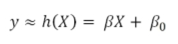

In [39]:
from IPython.display import Image
Image('./images/formula-regressao.png')

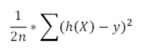

In [40]:
from IPython.display import Image
Image('./images/formula-cost-function.png')

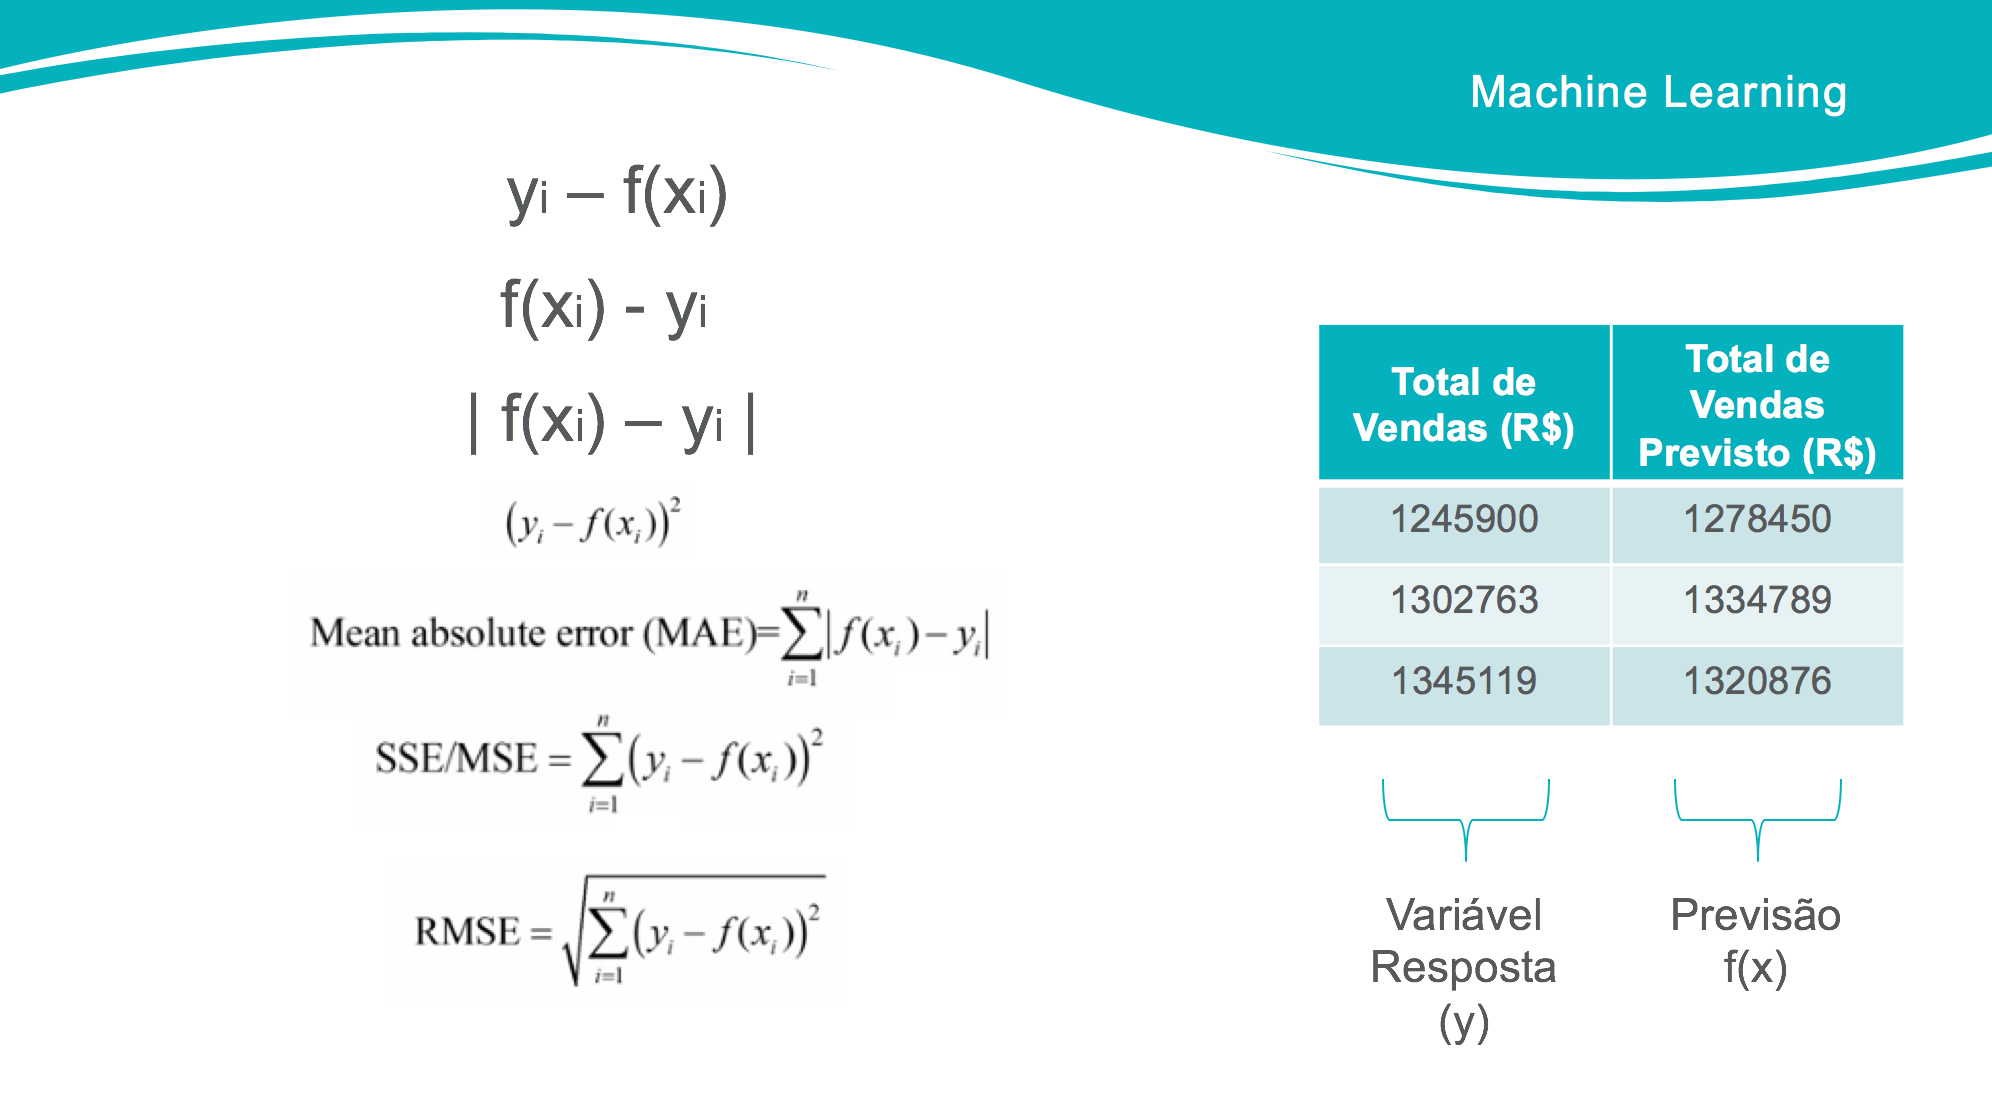

In [41]:
from IPython.display import Image
Image('./images/formulas.png')

In [42]:
# Definindo 2 conjuntos de dados
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [43]:
# Função para cálculo da Cost Function
def squared_cost(v, e):
    return np.sum((v - e) ** 2)

In [44]:
# A função fmin() tenta descobrir o valor do somatório mínimo dos quadrados
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [45]:
print('Resultado da Otimização: %0.1f' % (xopt[0]))
print('Média: %0.1f' % (np.mean(x)))
print('Mediana: %0.1f' % (np.median(x)))

Resultado da Otimização: 7.8
Média: 7.8
Mediana: 8.0


In [46]:
def absolute_cost(v, e):
    return np.sum(np.abs(v - e))

In [47]:
xopt = fmin(absolute_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [48]:
print('Resultado da Otimização: %0.1f' % (xopt[0]))
print('Média: %0.1f' % (np.mean(x)))
print('Mediana: %0.1f' % (np.median(x)))

Resultado da Otimização: 8.0
Média: 7.8
Mediana: 8.0
